<a href="https://colab.research.google.com/github/hanrockyhalim/MachineLearning/blob/main/Project_Based_Assignment_CLO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Hanrocky Halim - 1301213446
2. Fauzan Almas S - 1301210558
3. Riza Aufa Yuwanata - 1301213460

# Latar Belakang
Pembelajaran mesin merupakan cabang dari bidang kecerdasan buatan yang tingkat perkembangannya sangat pesat pada era ini. Hal ini didukung dengan perkembangan data yang sangat banyak masif. Perkembangan ini dapat membantu untuk mengelola, memahami, dan memanfaatkan data dengan cara yang sebelumnya tidak pernah dipikirkan. Kemajuan dalam bidang komputasi, seperti peningkatan daya komputasi, _cloud computing_ sehingga memungkinkan pembelajaran mesin untuk menjalani algoritma yang semakin kompleks dan membutuhkan perangkat komputasi yang lebih tinggi.

Dengan hadirnya teknologi pembelajaran mesin mengubah cara kita berinteraksi dengan teknologi secara garis besar. Seperti contoh, dengan hadirnya _chat gpt_ membuat pola perilaku manusia dalam mencari ilmu baru semakin mudah dan terarah meskipun tidak semuanya benar. Namun, tidak semua interaksi ini berarah ke arah yang positif, ada juga penyalahan yang terjadi seperti teknologi _deep fake_.


Supervised learning  adalah metode pembelajaran mesin di mana algoritma belajar dari data yang telah diberi label atau diberi instruksi.
Algoritma ini menggunakan data pelatihan dengan jawaban  atau label yang benar untuk memahami hubungan antara  data masukan dan keluaran yang sesuai.
Ada dua tugas utama dalam pembelajaran terawasi: klasifikasi , dimana model mengelompokkan data ke dalam kategori yang telah ditentukan, dan regresi, dimana model memprediksi nilai kontinu.
Supervised learning  memiliki berbagai aplikasi, seperti pengenalan wajah, terjemahan bahasa, dan prediksi harga aset berdasarkan data historis, sehingga memungkinkan  prediksi akurat yang dipandu oleh data pelatihan terlatih.

Regresi adalah bagian dari supervised learning dalam machine learning. Pada supervised learning, model diajarkan dengan menggunakan data yang sudah memiliki label atau target yang jelas. Dalam konteks regresi, label ini adalah nilai-nilai kontinu, yang berarti kita mencoba untuk memprediksi dan memodelkan nilai yang bersifat kontinu atau berkelanjutan.

Regresi adalah suatu teknik analisis yang digunakan untuk mengidentifikasi dan memahami hubungan antara dua variabel atau lebih. Tujuannya adalah untuk mencari dan membentuk suatu model matematis yang dapat menjelaskan atau memprediksi nilai variabel dependen (Y) berdasarkan nilai variabel independen (X) dengan seakurat mungkin. Dalam proses ini, regresi berupaya meminimalkan selisih antara nilai prediksi dari model dengan nilai sebenarnya dari data, yang dikenal sebagai kesalahan prediksi.

Dalam laporan ini, kami akan bereksplorasi terhadap konsep dasar yang terdapat pada pembelajaran mesin. Cara bereksplorasi ini akan diterapkan pada tautan di bawah ini _https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption_,

![picture](https://drive.google.com/uc?id=13QqzRt6pDKiuC_dL3ZNaJaA5iSSgQAXM)
dengan kasus yang regresi pada dataset yang dipilih.


In [ ]:
!pip install keras_tuner #parameter tuning
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hanrockyhalim/MachineLearning/main/Steel_industry_data.csv')
print(display(df))



,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


None


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [ ]:
df.describe(include=["object"])

,date,WeekStatus,Day_of_week,Load_Type
count,35040,35040,35040,35040
unique,35040,2,7,3
top,01/01/2018 00:15,Weekday,Monday,Light_Load
freq,1,25056,5088,18072


# Data Preprocessing


In [ ]:
# encoding the object data type
# le=LabelEncoder()
# df['WeekStatus']=le.fit_transform(df['WeekStatus'])
# df['Day_of_week']=le.fit_transform(df['Day_of_week'])
# df['Load_Type']=le.fit_transform(df['Load_Type'])
# print("WeekStatus:" , df['WeekStatus'].unique())
# print("DayofWeek:" , df['Day_of_week'].unique())
# print("LoadType:" , df['Load_Type'].unique())

In [ ]:
# Mapping untuk mengubah data bertipe objek ke integer (nilai numerik)

# Mapping 'Load_Type' dari kategori ke nilai numerik
load = {'Light_Load': 0, 'Medium_Load': 1, 'Maximum_Load': 2}
df['Load_Type'] = df['Load_Type'].map(load)
# Mapping 'Day_of_week' dari nama hari ke nilai numerik
day =  {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df['Day_of_week'] = df['Day_of_week'].map(day)
# Mapping 'WeekStatus' dari 'Weekday'/'Weekend' ke nilai numerik
week = {'Weekday': 0, 'Weekend': 1}
df['WeekStatus'] = df['WeekStatus'].map(week)

# Print data hasil mapping
print("WeekStatus:" , df['WeekStatus'].unique())
print("DayofWeek:" , df['Day_of_week'].unique())
print("LoadType:" , df['Load_Type'].unique())

WeekStatus: [0 1]
DayofWeek: [0 1 2 3 4 5 6]
LoadType: [0 1 2]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  int64  
 9   Day_of_week                           35040 non-null  int64  
 10  Load_Type                             35040 non-null  int64  
dtypes: float64(6), 

In [ ]:
# pemeriksaan apakah ada data yang memiliki value nul
print("Missing Values for :", df.isna().sum())

Missing Values for : date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


In [ ]:
# Menentukan kolom yang akan dihapus dari dataset
columns_to_drop = ['Load_Type', 'date']

# Menghapus kolom 'Load_Type' dan 'date' dari data fitur
X = df.drop(columns=columns_to_drop)

# kolom 'Load_Type' sebagai target
y = df['Load_Type']

# Membagi data menjadi data pelatihan (training) dan data pengujian (testing)
"""
Pengaturan 'random_state' pada 42 digunakan untuk memastikan hasil pemisahan data dapat direproduksi secara konsisten
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Cross Validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [ ]:
# Normalisasi Data
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_val = SS.fit_transform(X_val)
X_test = SS.transform(X_test)


# Exploration Data Analysis

<Axes: xlabel='Load_Type', ylabel='Usage_kWh'>

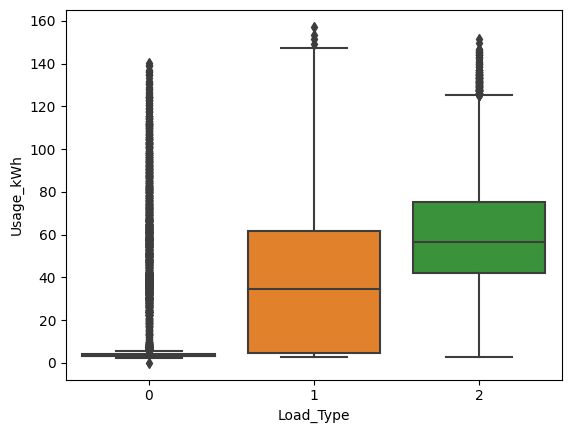

In [ ]:
# Load_Type terhadap Usage_kWh berdasarkan dataframe df
sns.boxplot(x = 'Load_Type', y = 'Usage_kWh', data = df )

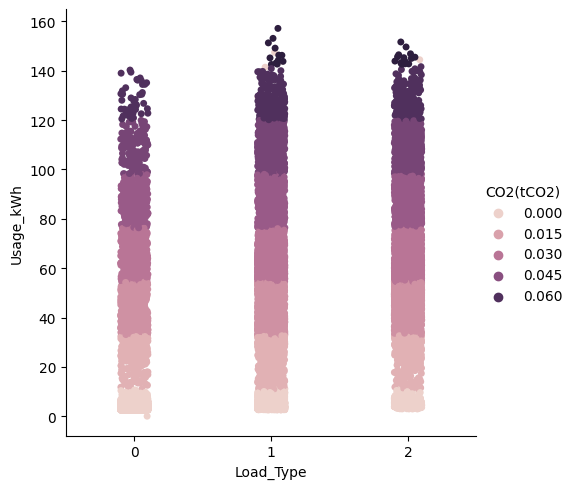

In [ ]:
# Load_Type terhadap Usage_kWh berdasarkan dataframe df
sns.catplot(x = 'Load_Type', y = 'Usage_kWh', hue = 'CO2(tCO2)', data = df)

<ipython-input-53-2374c8badf5e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method = 'pearson')


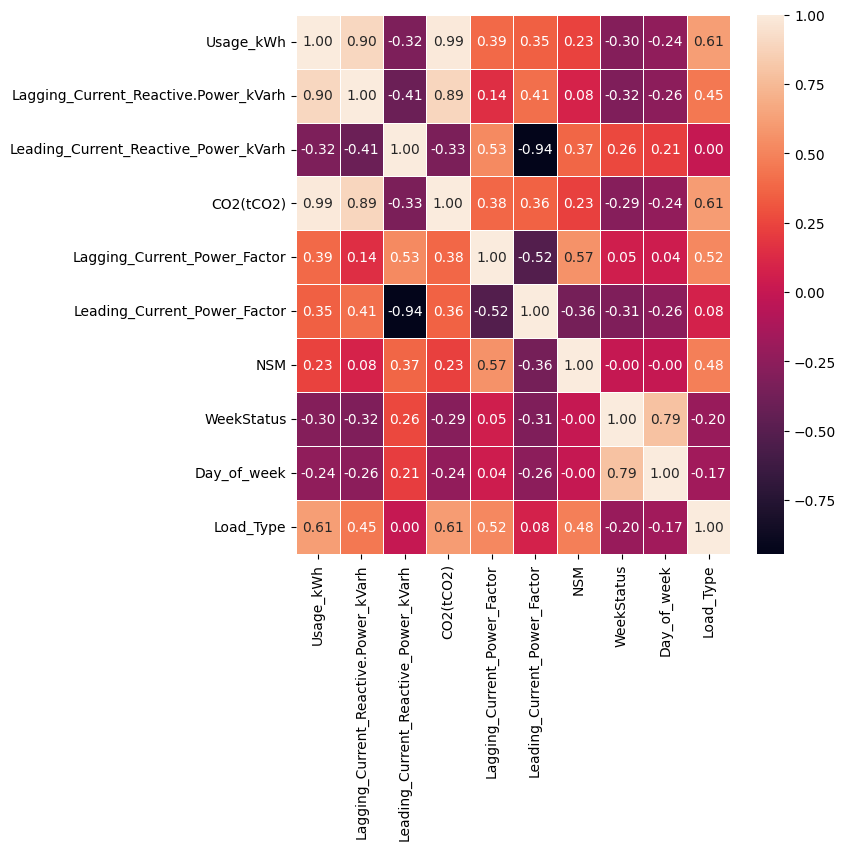

In [ ]:
# Pearson Correlations Matrix
corr = df.corr(method = 'pearson')
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()


#### Ringkasan Metode
Metode yang digunakan adalah Artificial Neural Network(ANN) untuk regresi linear yang pembentukannya menggunakan pemanfaatan dari library TensorFlow Keras. Model yang digunakan adalah model _sequential_ yang melakukan proses _foward-backward propagation_ terhadap model dense() atau layer neural network yang _fully-connected_.

Pada ketiga moedel ini, menggunakan activision layer berupa ReLU yang berfungsi untuk menyederhanakan nilai negatif menjadi nol agar mempermudah perhitungan serta mengeluarkan nilai test dengan nilai positif.

Tahapan yang dilakukan meliputi pembagian data menjadi data latih dan data uji, pembuatan model baseline, dan perancangan 3 model yang lebih kompleks untuk menghasilkan akurasi yang terbaik. Metrik evaluasi yang digunakan pada model ini difokuskan pada nilai Mean Squared Error (MSE) dengan nilai evaluasi _loss_ difokuskan pada nilai _Mean Absolute Error_ (MAE)


In [ ]:
# import methods yang diperlukan
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Dense

# Create an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)





In [ ]:
# Baseline Model
opt = Adam(learning_rate=0.001)

model = keras.Sequential([
    # Layer input dengan 9 fitur
    keras.layers.Input(shape=(9,)),
    # Output layer 1 unit untuk kasus regresi, fungsi aktivasi relu
    keras.layers.Dense(units=1, activation='relu')
])

# Compile model dengan pengaturan optimizer, fungsi loss menggunakan mae, dan metrik menggunakan mse
model.compile(optimizer=opt, loss='mae', metrics=['mse'])

# Melatih model dengan data latihan (X_train, y_train) selama 50 epoch dengan batch size 32
# Data validasi (X_val, y_val) digunakan untuk mengevaluasi performa model selama pelatihan
# Callback 'early_stopping' digunakan untuk menghentikan pelatihan jika tidak ada peningkatan dalam validasi
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val,y_val), callbacks=[early_stopping])

Epoch 1/50
661/661 [==============================] - 1s 2ms/step - loss: 0.7513 - mse: 1.1870 - val_loss: 0.4263 - val_mse: 0.4423
Epoch 2/50
661/661 [==============================] - 1s 1ms/step - loss: 0.3895 - mse: 0.3720 - val_loss: 0.3653 - val_mse: 0.3280
Epoch 3/50
661/661 [==============================] - 1s 1ms/step - loss: 0.3683 - mse: 0.3294 - val_loss: 0.3543 - val_mse: 0.3051
Epoch 4/50
661/661 [==============================] - 1s 1ms/step - loss: 0.3594 - mse: 0.3140 - val_loss: 0.3496 - val_mse: 0.2947
Epoch 5/50
661/661 [==============================] - 1s 1ms/step - loss: 0.3552 - mse: 0.3050 - val_loss: 0.3472 - val_mse: 0.2938
Epoch 6/50
661/661 [==============================] - 1s 1ms/step - loss: 0.3532 - mse: 0.3031 - val_loss: 0.3462 - val_mse: 0.2907
Epoch 7/50
661/661 [==============================] - 1s 1ms/step - loss: 0.3519 - mse: 0.3003 - val_loss: 0.3447 - val_mse: 0.2912
Epoch 8/50
661/661 [==============================] - 1s 1ms/step - loss: 0.

Best Validation Loss: 0.3398
Best Validation MSE: 0.2825


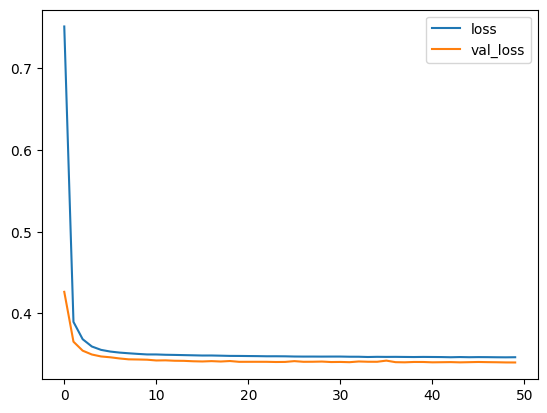

In [ ]:
# Konversi Riwayat Pelatihan menjadi sebuah dataframe
history_df = pd.DataFrame(history.history)
# Plot Method dengan Pandas Native
history_df.loc[:, ['loss', 'val_loss']].plot();
# Print informasi tentang performa terbaik selama pelatihan
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation MSE: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_mse'].min(),
              ))

In [ ]:
# Evaluasi model pada data pengujian
test_loss, test_mse = model.evaluate(X_test, y_test)
print(f'Test MSE: {test_mse}')


362/362 [==============================] - 0s 978us/step - loss: 0.3477 - mse: 0.2929
Test MSE: 0.29293885827064514


# Model Exploration (at least 3 scheme)

In [ ]:
# penambahan jumlah parameter and peningkatan batch size (Model 1)
opt_1 = Adam(learning_rate=0.001)

model = keras.Sequential([
    # Layer input dengan 9 fitur
    keras.layers.Input(shape=(9,)),
    # Hidden layer 32 unit dan dengan fungsi aktivasi ReLU
    keras.layers.Dense(units=32, activation='relu'),
    # 2nd Hidden layer 16 unit dan dengan fungsi aktivasi ReLU
    keras.layers.Dense(units=16, activation='relu'),
    # Output layer 1 unit untuk kasus regresi, fungsi aktivasi Linear
    keras.layers.Dense(units=1, activation='linear')
])

# Compile model dengan pengaturan optimizer, fungsi loss menggunakan mae, dan metrik menggunakan mse
model.compile(optimizer=opt_1, loss='mae', metrics=['mse'])

# Melatih model dengan data latihan (X_train, y_train) selama 50 epoch dengan batch size 64
# Data validasi (X_val, y_val) digunakan untuk mengevaluasi performa model selama pelatihan
# Callback 'early_stopping' digunakan untuk menghentikan pelatihan jika tidak ada peningkatan dalam validasi
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val,y_val), callbacks=[early_stopping])

Epoch 1/50
331/331 [==============================] - 1s 2ms/step - loss: 0.3810 - mse: 0.3419 - val_loss: 0.3272 - val_mse: 0.2571
Epoch 2/50
331/331 [==============================] - 0s 1ms/step - loss: 0.3157 - mse: 0.2507 - val_loss: 0.2933 - val_mse: 0.2228
Epoch 3/50
331/331 [==============================] - 1s 2ms/step - loss: 0.2805 - mse: 0.2145 - val_loss: 0.2611 - val_mse: 0.1840
Epoch 4/50
331/331 [==============================] - 1s 2ms/step - loss: 0.2447 - mse: 0.1757 - val_loss: 0.2310 - val_mse: 0.1640
Epoch 5/50
331/331 [==============================] - 1s 2ms/step - loss: 0.2252 - mse: 0.1594 - val_loss: 0.2191 - val_mse: 0.1561
Epoch 6/50
331/331 [==============================] - 0s 1ms/step - loss: 0.2163 - mse: 0.1537 - val_loss: 0.2114 - val_mse: 0.1500
Epoch 7/50
331/331 [==============================] - 1s 2ms/step - loss: 0.2106 - mse: 0.1504 - val_loss: 0.2134 - val_mse: 0.1521
Epoch 8/50
331/331 [==============================] - 0s 1ms/step - loss: 0.

Best Validation Loss: 0.1750
Best Validation MSE: 0.1412


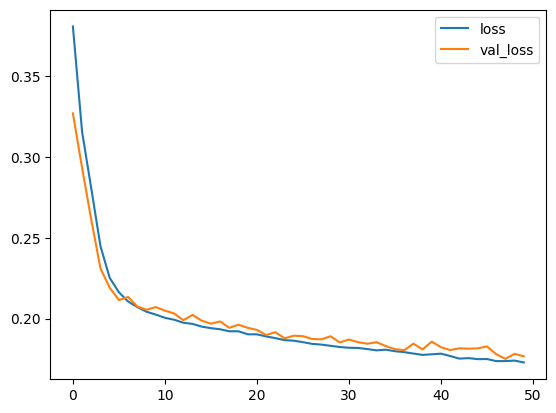

In [ ]:
# Konversi Riwayat Pelatihan menjadi sebuah dataframe
history_df = pd.DataFrame(history.history)
# Plot Method dengan Pandas Native
history_df.loc[:, ['loss', 'val_loss']].plot();
# Print informasi tentang performa terbaik selama pelatihan
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation MSE: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_mse'].min()))

In [ ]:
# Evaluasi model pada data pengujian
test_loss, test_MSE = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_MSE}')

362/362 [==============================] - 0s 1ms/step - loss: 0.1824 - mse: 0.1515
Test accuracy: 0.15152381360530853


In [ ]:
# Peningkatan Learning Rate (model 2)

opt_2 = Adam(learning_rate=0.0001)

model = tf.keras.Sequential([
    # Layer input dengan 9 fitur
    # Hidden layer 32 unit dan dengan fungsi aktivasi ReLU
    Dense(32, activation='relu', input_shape=(9,)),
    # 2nd Hidden layer 16 unit dan dengan fungsi aktivasi ReLU
    Dense(16, activation='relu'),
    # Output layer 1 unit untuk kasus regresi, fungsi aktivasi relu
    Dense(1, activation='relu')
])

# Compile model dengan pengaturan optimizer, fungsi loss menggunakan mae, dan metrik menggunakan mse
model.compile(optimizer=opt_2, loss='mae', metrics=['mse'])

# Melatih model dengan data latihan (X_train, y_train) selama 50 epoch dengan batch size 64
# Data validasi (X_val, y_val) digunakan untuk mengevaluasi performa model selama pelatihan
# Callback 'early_stopping' digunakan untuk menghentikan pelatihan jika tidak ada peningkatan dalam validasi
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val,y_val), callbacks=[early_stopping])

Epoch 1/50
331/331 [==============================] - 1s 2ms/step - loss: 0.5660 - mse: 0.7152 - val_loss: 0.4213 - val_mse: 0.4458
Epoch 2/50
331/331 [==============================] - 1s 2ms/step - loss: 0.4093 - mse: 0.4200 - val_loss: 0.3844 - val_mse: 0.3638
Epoch 3/50
331/331 [==============================] - 0s 1ms/step - loss: 0.3729 - mse: 0.3364 - val_loss: 0.3415 - val_mse: 0.2799
Epoch 4/50
331/331 [==============================] - 1s 2ms/step - loss: 0.3385 - mse: 0.2856 - val_loss: 0.3247 - val_mse: 0.2625
Epoch 5/50
331/331 [==============================] - 1s 2ms/step - loss: 0.3274 - mse: 0.2739 - val_loss: 0.3167 - val_mse: 0.2536
Epoch 6/50
331/331 [==============================] - 1s 2ms/step - loss: 0.3196 - mse: 0.2655 - val_loss: 0.3100 - val_mse: 0.2481
Epoch 7/50
331/331 [==============================] - 0s 1ms/step - loss: 0.3124 - mse: 0.2583 - val_loss: 0.3036 - val_mse: 0.2434
Epoch 8/50
331/331 [==============================] - 0s 1ms/step - loss: 0.

Best Validation Loss: 0.2021
Best Validation MSE: 0.1664
362/362 [==============================] - 0s 1ms/step - loss: 0.2049 - mse: 0.1768
Test accuracy: 0.17676542699337006


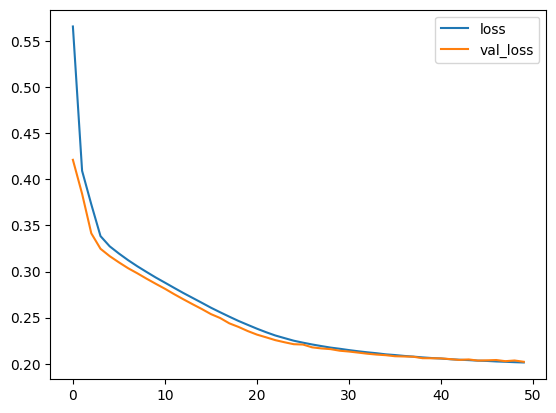

In [ ]:
# Konversi Riwayat Pelatihan menjadi sebuah dataframe
history_df = pd.DataFrame(history.history)
# Plot Method dengan Pandas Native
history_df.loc[:, ['loss', 'val_loss']].plot();
# Print informasi tentang performa terbaik selama pelatihan
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation MSE: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_mse'].min()))

# Evaluasi model pada data pengujian
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_mse}')

In [ ]:
# Penambahan jumlah parameters secara masif, tambahan : dropout, batch normalization, dan peningkatan epochs (Model 3)

# Learning Rate
opt_3 = Adam(learning_rate=0.001)

model = tf.keras.Sequential([
    # Layer input dengan 9 fitur
    # Hidden layer 150 unit dan dengan fungsi aktivasi ReLU
    Dense(150, activation='relu', input_shape=(9,)),
    # Dropout layer dengan tingkat dropout 0.05
    keras.layers.Dropout(rate=0.05),
    # Layer normalisasi batch
    BatchNormalization(),
    # 2nd Hidden layer 360 unit dan dengan fungsi aktivasi ReLU
    Dense(360, activation='relu'),
    # Dropout layer dengan tingkat dropout 0.05
    keras.layers.Dropout(rate=0.05),
    # Layer normalisasi batch
    BatchNormalization(),
    # Output Layer dengan 1 unit, fungsi aktivasi relu
    Dense(1, activation='relu')
])

# Compile model dengan pengaturan optimizer, fungsi loss menggunakan mae, dan metrik menggunakan mse
model.compile(optimizer=opt_3, loss='mae', metrics=['mse'])

# Melatih model dengan data latihan (X_train, y_train) selama 50 epoch dengan batch size 126
# Data validasi (X_val, y_val) digunakan untuk mengevaluasi performa model selama pelatihan
# Callback 'early_stopping' digunakan untuk menghentikan pelatihan jika tidak ada peningkatan dalam validasi
history = model.fit(X_train, y_train, epochs=50, batch_size=126, validation_data=(X_val,y_val), callbacks=[early_stopping])

Epoch 1/50
168/168 [==============================] - 2s 5ms/step - loss: 0.3600 - mse: 0.3822 - val_loss: 0.6761 - val_mse: 1.0759
Epoch 2/50
168/168 [==============================] - 1s 6ms/step - loss: 0.2969 - mse: 0.2676 - val_loss: 0.3029 - val_mse: 0.2611
Epoch 3/50
168/168 [==============================] - 1s 6ms/step - loss: 0.2632 - mse: 0.2232 - val_loss: 0.2375 - val_mse: 0.1769
Epoch 4/50
168/168 [==============================] - 1s 5ms/step - loss: 0.2500 - mse: 0.2049 - val_loss: 0.2072 - val_mse: 0.1540
Epoch 5/50
168/168 [==============================] - 1s 5ms/step - loss: 0.2395 - mse: 0.1949 - val_loss: 0.2098 - val_mse: 0.1617
Epoch 6/50
168/168 [==============================] - 1s 5ms/step - loss: 0.2306 - mse: 0.1869 - val_loss: 0.2046 - val_mse: 0.1594
Epoch 7/50
168/168 [==============================] - 1s 5ms/step - loss: 0.2237 - mse: 0.1802 - val_loss: 0.2075 - val_mse: 0.1646
Epoch 8/50
168/168 [==============================] - 1s 5ms/step - loss: 0.

Best Validation Loss: 0.1594
Best Validation MSE: 0.1247
362/362 [==============================] - 1s 1ms/step - loss: 0.1638 - mse: 0.1312
Test accuracy: 0.13118936121463776


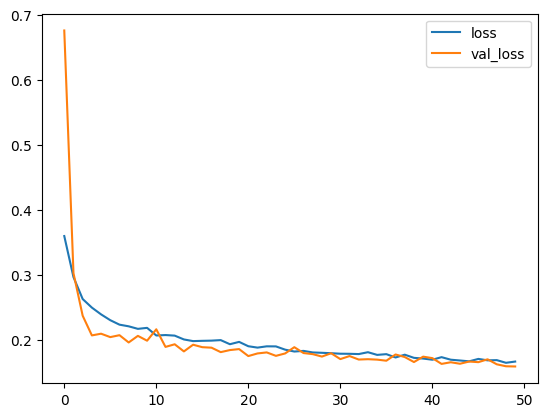

In [ ]:
# Konversi Riwayat Pelatihan menjadi sebuah dataframe
history_df = pd.DataFrame(history.history)
# Plot Method dengan Pandas Native
history_df.loc[:, ['loss', 'val_loss']].plot();
# Print informasi tentang performa terbaik selama pelatihan
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation MSE: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_mse'].min()))

# Evaluasi model pada data pengujian
test_loss, test_mse = model.evaluate(X_test, y_test)
print(f'test mse: {test_mse}')

In [ ]:
# Hyperparameter Tunning
# Fungsi model_builder digunakan untuk mendefinisikan model neuron dengan hyperparameter yang disesuaikan
def model_builder(hp):
    model = tf.keras.Sequential()

    # Define the input layer with the number of input features (9 in your case)
    # Model dimulai dengan lapisan input dengan jumlah unit yang bisa diatur dengan menggunakan hyperparameter 'input_units'
    # Fungsi aktivasi untuk lapisan input bisa disesuaikan dengan menggunakan hyperparameter 'input_activation'
    model.add(tf.keras.layers.Dense(units=hp.Int('input_units', min_value=16, max_value=512, step=8),
                                   input_shape=(9,),
                                   activation=hp.Choice('input_activation', values=['relu'])))

    # Define hyperparameters
    # Beberapa hyperparameter lain seperti 'activation' untuk aktivasi hidden layer, 'layer_1' dan 'layer_2' untuk jumlah unit dalam hidden layer
    hp_activation = hp.Choice('activation', values=['relu'])
    hp_layer_1 = hp.Int('layer_1', min_value=16, max_value=256, step=16)
    hp_layer_2 = hp.Int('layer_2', min_value=16, max_value=256, step=16)
    # penetapan 'learning_rate'
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Add hidden layers
    # Model mencakup dua lapisan tersembunyi dengan jumlah unit yang bisa diatur sesuai dengan hyperparameter yang ditentukan
    model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation))
    model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation))

    # Output layer for a regression
    # Lapisan output dirancang untuk tugas regresi dengan satu unit dan aktivasi linear.
    model.add(tf.keras.layers.Dense(1, activation='relu'))

    # Compile the model
    # Model dikompilasi dengan optimizer Adam, fungsi loss "mae" (Mean Absolute Error), dan metrik "mse" (Mean Squared Error)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss="mae",
                  metrics=['mse'])

    return model

In [ ]:
import keras_tuner
#Use RandomSearch to find optimal parameter
# Menggunakan fungsi model_builder yang telah didefinisikan sebelumnya
tuner = keras_tuner.RandomSearch(
    model_builder,
    # Menentukan tujuan pencarian ( validation loss ) terendah
    objective='val_loss',
    # Jumlah percobaan yang akan dilakukan
    max_trials=5)


In [ ]:
# Pencarian parameter dengan data latih dan data validasi, epoch 50, Data validasi (X_val, y_val), dan Callback 'early_stopping'
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])
# Mengambil model terbaik dari hasil pencarian
model = tuner.get_best_models()[0]

Trial 5 Complete [00h 01m 52s]
val_loss: 0.17521192133426666

Best val_loss So Far: 0.13146719336509705
Total elapsed time: 00h 13m 26s


In [ ]:
# Melatih model dengan data latihan (X_train, y_train) selama 50 epoch dengan batch size 256
# Data validasi (X_val, y_val) digunakan untuk mengevaluasi performa model selama pelatihan
# Callback 'early_stopping' digunakan untuk menghentikan pelatihan jika tidak ada peningkatan dalam validasi
history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_val,y_val), callbacks=[early_stopping])

Epoch 1/50
83/83 [==============================] - 1s 7ms/step - loss: 0.1172 - mse: 0.1151 - val_loss: 0.1196 - val_mse: 0.1176
Epoch 2/50
83/83 [==============================] - 0s 6ms/step - loss: 0.1128 - mse: 0.1117 - val_loss: 0.1194 - val_mse: 0.1182
Epoch 3/50
83/83 [==============================] - 1s 6ms/step - loss: 0.1117 - mse: 0.1108 - val_loss: 0.1180 - val_mse: 0.1172
Epoch 4/50
83/83 [==============================] - 0s 6ms/step - loss: 0.1115 - mse: 0.1108 - val_loss: 0.1183 - val_mse: 0.1176
Epoch 5/50
83/83 [==============================] - 1s 6ms/step - loss: 0.1113 - mse: 0.1099 - val_loss: 0.1201 - val_mse: 0.1193
Epoch 6/50
83/83 [==============================] - 0s 5ms/step - loss: 0.1107 - mse: 0.1095 - val_loss: 0.1179 - val_mse: 0.1172
Epoch 7/50
83/83 [==============================] - 0s 6ms/step - loss: 0.1105 - mse: 0.1092 - val_loss: 0.1211 - val_mse: 0.1212
Epoch 8/50
83/83 [==============================] - 0s 6ms/step - loss: 0.1098 - mse: 0.10

Best Validation Loss: 0.1161
Best Validation Accuracy: 0.1158


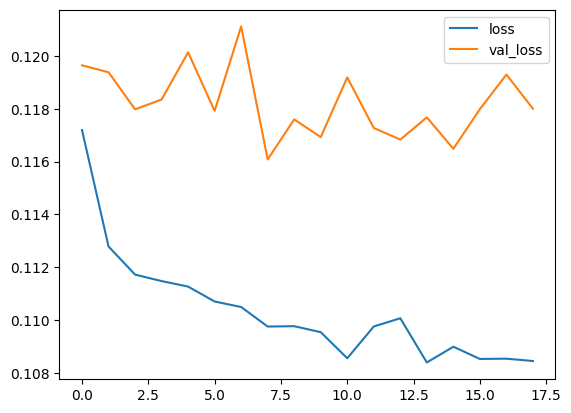

In [ ]:
# Konversi Riwayat Pelatihan menjadi sebuah dataframe
history_df = pd.DataFrame(history.history)
# Plot Method dengan Pandas Native
history_df.loc[:, ['loss', 'val_loss']].plot();
# Print informasi tentang performa terbaik selama pelatihan
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_mse'].min()))

In [ ]:
# Evaluasi model pada data pengujian
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

362/362 [==============================] - 0s 1ms/step - loss: 0.1229 - mse: 0.1212
Test accuracy: 0.12121706455945969


## Hasil dan Analisis
### Data Preprocessing
Data preprocessing adalah tahap penting dalam analisis data dan pembuatan model di dalam machine learning dan data science. Tujuan dari data preprocessing adalah untuk membersihkan, mengatur, dan mengubah data mentah menjadi bentuk yang lebih baik dan lebih siap digunakan untuk analisis dan pemodelan. Datasets yang digunakan tidak memiliki _null value_ sehingga proses penggantian data _null_ tidak dilakukan.
Pada tahap ini, beberapa proses yang terjadi sebagai mana berikut:
>Mengubah Format data
>>Pada _dataset_ yang digunakan, ada beberapa _value_ bertipe _object_ sehingga diharuskan untuk mengubahnya ke bentuk number yang membantu untuk proses pemodelan data, dengan menggunakan function _map()_ dengan parameter _object_ yang ingin dirubah.

>Mereduksi Dimensi
>>Menghilangkan beberapa data yang tidak akan dimasukan ke dalam perhitungan karena data tersebut tidak relevan serta memisahkan data yang bernilai target ke dalam variable nya sendiri. Hal ini dapat dilakukan dengan menggunakan fungsi _drop()_

>Standardisasi
>>Data yang berasal dari berbagai sumber atau dengan skala yang berbeda dapat diubah menjadi skala yang konsisten. Ini membantu memastikan bahwa variabel-variabel memiliki dampak yang seimbang pada model. Pada dataset ini, proses standardisasi menggunakan fungsi _StandarScaler()_. Hal ini agar bisa mengurangi data memiliki skala yang berbeda antar satu nilai dengan nilai lainnya serta mempercepat pelatihan model.
###Pengujian ANN
Berdasarkan ketiga model ANN yang dirancang, terlihat perancangan model yang lebih kompleks dapat membantu untuk menurunkan nilai loss. Hal ini disebabkan oleh penambahan _weight_ dan _bias_ pada model yang lebih kompleks membantu dalam meraih rumus yang tepat berdasarkan nilai _input_ dan _output_ yang disediakan

Di satu sisi, pemanfaatan 'Dropout()' serta 'BatchNormalization()' pada pelatihan model 3 menghasilkan MAE  yang lebih rendah dibandingkan dengan model yang hanya ditambahkan _parameters_ dan _batch_ selayaknya model 1 ataupun hanya menambahkan _learning rate_ nya saja yang terjadi pada model 2.

Terlihat dari ketiga model yang dibangun, nilai _Mean Squared Error_ dan _Loss Valuation_ sulit untuk menyentuh di bawah 0.1. Hal ini terjadi karena erat dengan kualitas data yang terdapat pada _dataset_ nya, maupun banyaknya korelasi yang tidak terbentuk dari dimensi data ke dimensi data yang lain. Sehingga hal ini memungkinkan untuk mengurangi ketercapaian MAE maupun MSE berada di titik di bawah 0.1 yang sebagaimana tertera pada tabel di bawah berikut

![picture](https://drive.google.com/uc?id=19fZ9bV_hhrdnoY9zc8mpon__LUW2Gz60)

## Kesimpulan

Dalam eksperimen pelatihan ANN untuk regresi linear, terlihat bahwa pra-pemrosesan data yang cermat dan pemilihan model yang tepat memainkan peran penting dalam menentukan performa. Model-model ANN yang lebih kompleks dengan lapisan-lapisan tambahan dan teknik-teknik seperti dropout dan normalisasi batch cenderung menghasilkan hasil yang lebih baik, terutama dengan Mean Absolute Error (MAE) yang lebih rendah. Namun, mencapai tingkat kesalahan yang sangat rendah (di bawah 0.1) mungkin sulit, dan hal ini dapat disebabkan oleh kualitas data yang kurang optimal dan ketidaksempurnaan hubungan antar variabel dalam dataset. Oleh karena itu, eksperimen ini menyoroti pentingnya pemahaman yang mendalam tentang data sebelum melibatkan model yang lebih kompleks. Dalam konteks ini, pra-pemrosesan data yang cermat, pemilihan model yang sesuai, dan penilaian kualitas data menjadi faktor penentu dalam mencapai hasil yang baik dalam regresi linear dengan ANN.